In [1]:
##Model Building Using Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
import seaborn as sns

In [3]:
df=pd.read_csv('E:\\FinalyearProject\\AQI\\Data\\Real-Data\\Real_combine.csv')

In [4]:
df


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,17.3,24.4,8.9,1016.2,83.0,1.3,1.3,5.4,272.125000
1,20.5,25.4,10.5,1012.8,60.0,1.8,0.9,3.5,205.250000
2,17.1,21.7,8.8,1015.4,41.0,1.9,2.2,5.4,214.041667
3,14.7,20.7,7.1,1017.0,70.0,1.0,2.8,3.5,210.125000
4,16.8,21.3,6.5,1018.0,49.0,1.8,0.9,3.5,227.750000
...,...,...,...,...,...,...,...,...,...
938,13.9,18.7,8.6,1016.2,78.0,1.8,2.8,3.5,310.250000
939,13.2,18.3,8.4,1015.3,82.0,1.8,1.9,3.5,375.791667
940,10.9,14.0,7.0,1019.3,86.0,1.0,2.2,5.4,223.250000
941,12.6,15.7,7.4,1017.8,80.0,1.0,2.2,3.5,248.958333


In [5]:
df.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

<AxesSubplot:>

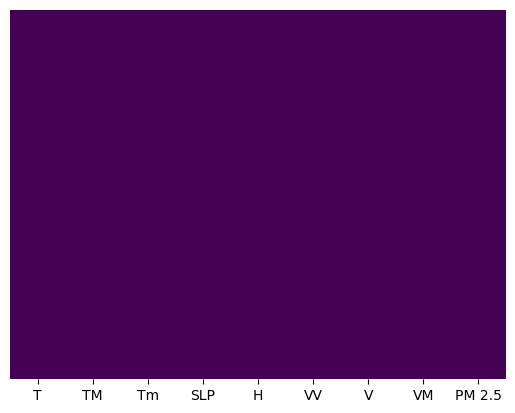

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#dependent features x
x=df.iloc[:,:-1]
#independent feature Y
y=df.iloc[:,-1]

In [8]:
x.isnull().sum()

T      0
TM     0
Tm     0
SLP    0
H      0
VV     0
V      0
VM     0
dtype: int64

In [9]:
y.isnull().sum()

0

In [10]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,17.3,24.4,8.9,1016.2,83.0,1.3,1.3,5.4,272.125000
1,20.5,25.4,10.5,1012.8,60.0,1.8,0.9,3.5,205.250000
2,17.1,21.7,8.8,1015.4,41.0,1.9,2.2,5.4,214.041667
3,14.7,20.7,7.1,1017.0,70.0,1.0,2.8,3.5,210.125000
4,16.8,21.3,6.5,1018.0,49.0,1.8,0.9,3.5,227.750000


In [11]:
data=df.dropna()

In [12]:
data.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

In [13]:
df.corr()


,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.972763,0.913058,-0.861929,-0.354311,0.427086,0.137813,0.074783,-0.617898
TM,0.972763,1.000000,0.873309,-0.826864,-0.396475,0.437344,0.157399,0.106544,-0.579814
Tm,0.913058,0.873309,1.000000,-0.910528,-0.025256,0.309160,0.161006,0.105496,-0.657685
SLP,-0.861929,-0.826864,-0.910528,1.000000,0.023366,-0.267201,-0.143692,-0.091747,0.602746
H,-0.354311,-0.396475,-0.025256,0.023366,1.000000,-0.434285,-0.205086,-0.136457,0.031034
VV,0.427086,0.437344,0.309160,-0.267201,-0.434285,1.000000,0.233203,0.109730,-0.259394
V,0.137813,0.157399,0.161006,-0.143692,-0.205086,0.233203,1.000000,0.816765,-0.121758
VM,0.074783,0.106544,0.105496,-0.091747,-0.136457,0.109730,0.816765,1.000000,-0.070846
PM 2.5,-0.617898,-0.579814,-0.657685,0.602746,0.031034,-0.259394,-0.121758,-0.070846,1.000000


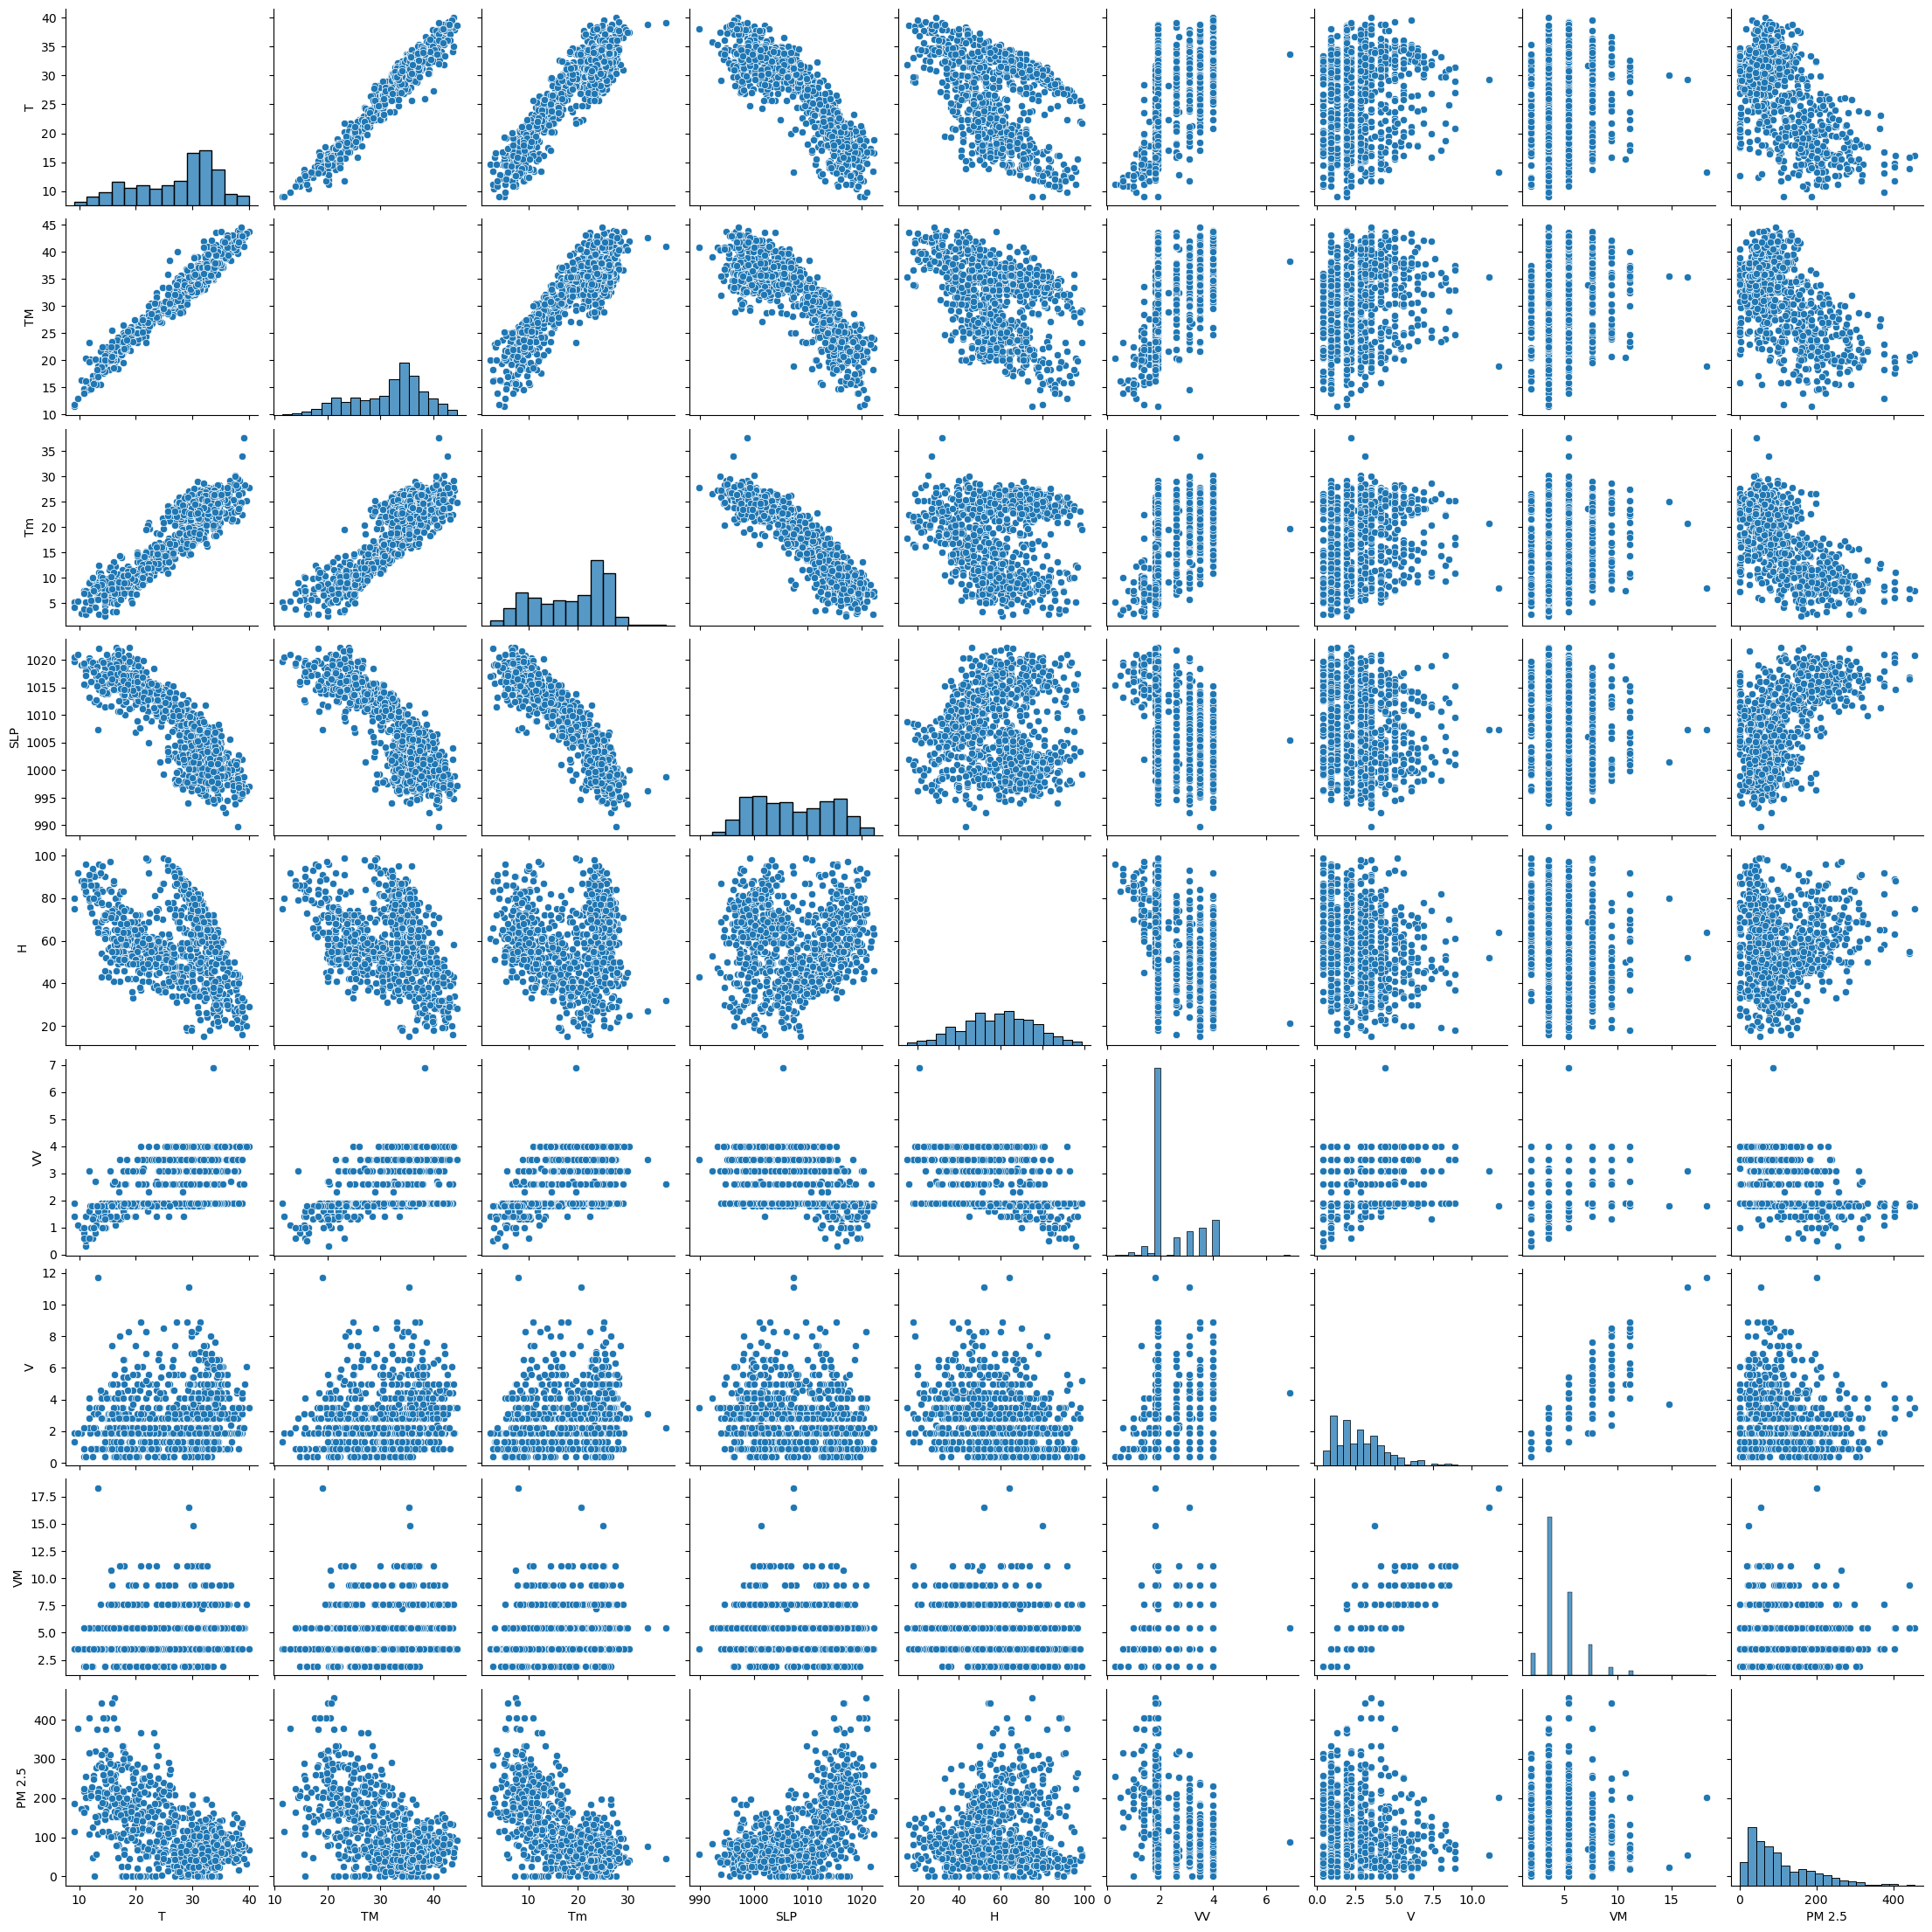

In [14]:
sns.pairplot(data)

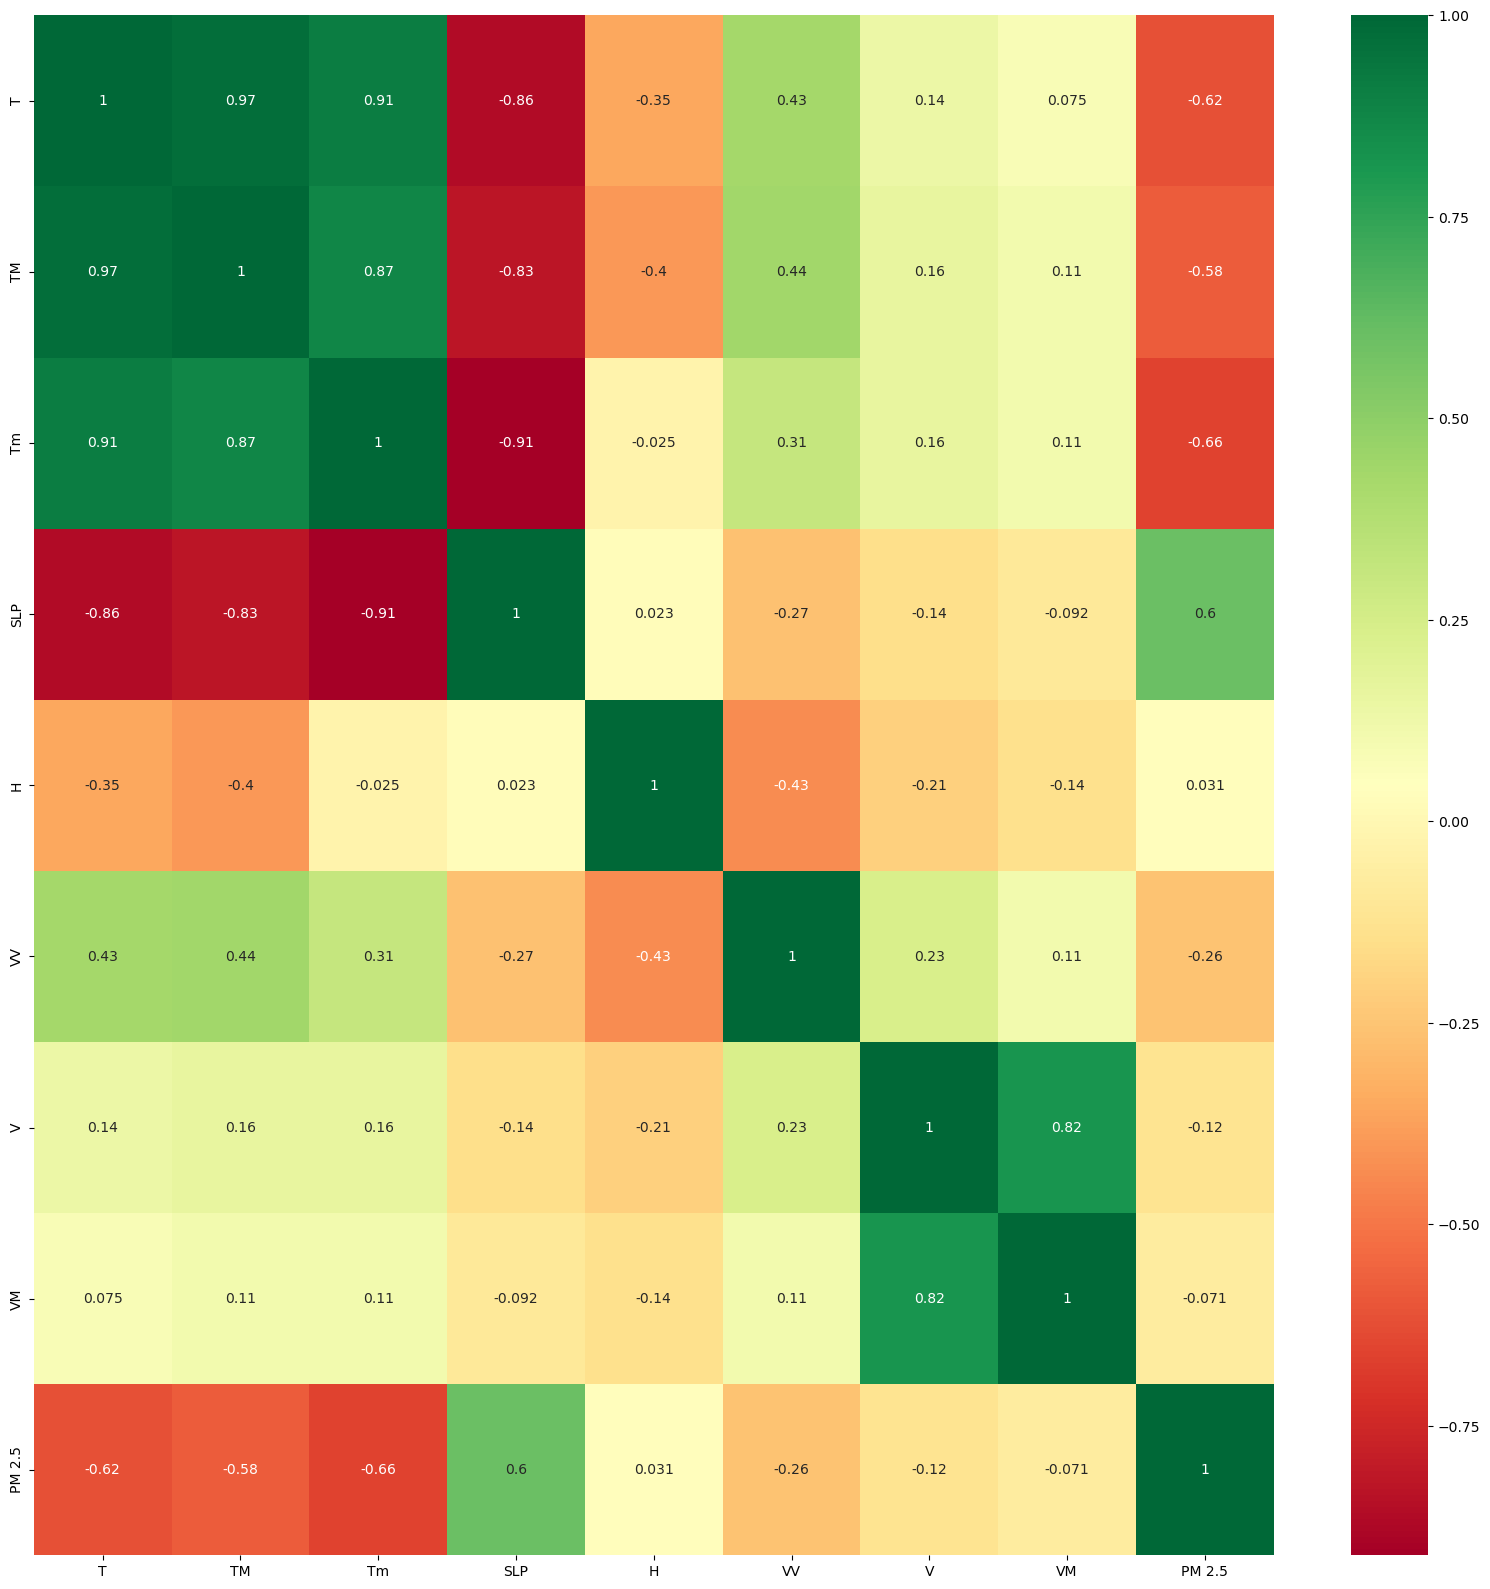

In [15]:
import seaborn as sns
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
data.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,27.114422,31.523754,18.434146,1007.339767,58.430541,2.370520,2.752916,4.647720,104.722261
std,6.972599,6.658233,7.000229,7.223708,17.042011,0.840142,1.735862,2.007405,82.887435
min,9.100000,11.500000,2.400000,989.800000,15.000000,0.300000,0.400000,1.900000,0.000000
25%,21.300000,26.600000,12.000000,1001.000000,47.000000,1.900000,1.300000,3.500000,41.875000
50%,29.500000,33.400000,20.300000,1006.800000,59.000000,1.900000,2.800000,3.500000,78.254167
75%,32.350000,36.000000,24.500000,1013.900000,71.000000,3.100000,3.500000,5.400000,152.604167
max,40.000000,44.500000,37.600000,1022.200000,99.000000,6.900000,11.700000,18.300000,455.583333


In [17]:
# linear Rgression help to make the best fit line 


# Feature Importance

In [18]:
# you can get the feature importance of each feature of your dataset
# feature importance gives you score for each feture of your dataset higher the score higher the importance of feature
#to find this we use the in built class that comes with Tree based Regressor we use extra tree regressor to get the feature importance


In [19]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [20]:
print(model.feature_importances_)

[0.15989113 0.14606654 0.25707891 0.18019407 0.0965316  0.05625237
 0.06862893 0.03535646]


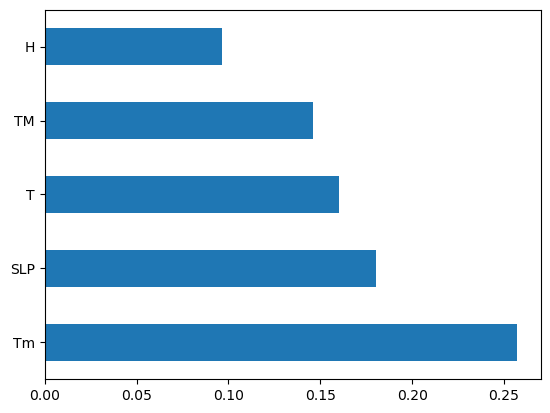

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

##Linear Regression

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

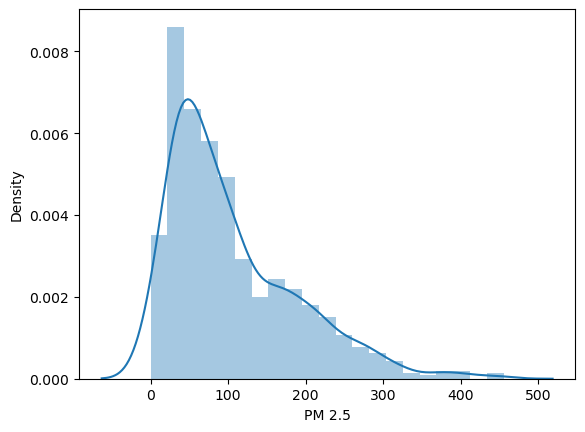

In [22]:
sns.distplot(y)

Train

# Train & test split

In [23]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,y_Train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [24]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_Train,y_Train)

LinearRegression()

In [25]:
# now checking the cofficient of detemination for test and train

In [26]:
print("Cofficient of Determination R^2".format(regressor.score(X_Train,y_Train)))

Cofficient of Determination R^2


In [27]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

In [28]:
score.mean()

0.4099542345828987

In [29]:
# it si worst for this dataset because Linear Regression make the best fit line and the datset far from the line make error 

# Model Evaluation

In [30]:
coff=pd.DataFrame(regressor.coef_,x.columns,columns=["cofficient"])
coff

,cofficient
T,-5.493553
TM,2.346578
Tm,-4.566290
SLP,-0.046232
H,-0.448874
VV,-6.373536
V,-2.421557
VM,1.045755


# Interpreating the cofficient 
 Holding all other features fixed and if we increase 1 unit value of T then there will be 5.49 decrease in AQI PM2.5


In [31]:
pred=regressor.predict(X_Test)

In [32]:
pred

array([ 65.77432504, 131.97137827, 186.13241606, 132.62500881,
       116.08573596,  95.2824511 ,  64.09302005, 183.37825928,
        41.22883104,  60.6840471 ,  72.48614886,  38.50926613,
        61.70717608,  54.98182593,  42.57609956, 144.33584176,
       159.56099913, 174.81846807,  98.69387007,  41.50710288,
        60.94892256,  63.34953649, 160.26172179, 100.7187095 ,
       162.20060237,  56.2687218 ,  27.68467369,  44.91556116,
        94.5728579 ,  78.53206637,  54.07193173, 182.09576492,
        67.59681138, 210.51669244,  41.35493334,  65.5720462 ,
       192.09711677,  60.45299731,  65.49581376, 192.17238063,
       148.13233568,  48.42346565,  43.41271028,  64.21632519,
       148.68493123,  86.9209178 ,  68.40651168,  54.6339014 ,
       138.14557253, 120.48711281, 202.50102278,  38.51176018,
       185.59072137,  61.79007952,  60.68167242,  58.27404629,
       111.7981826 ,  62.7025342 , 107.90563548, 198.50521846,
       160.11026749,  39.20482525,  37.35402559,  65.73

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

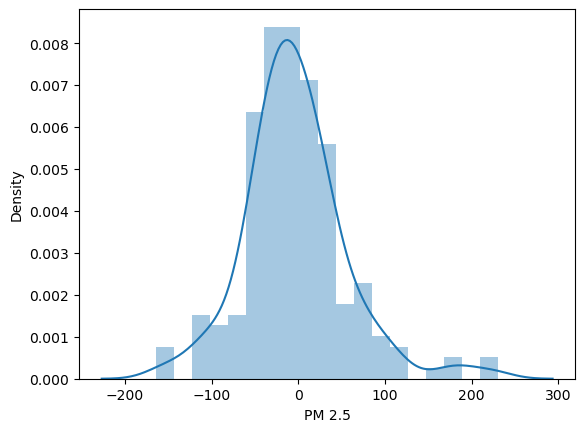

In [33]:
sns.distplot(y_test-pred)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.


In [34]:
from sklearn import metrics


In [35]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 43.0241480547748
MSE: 3521.83019996276
RMSE: 59.345009899424234


# Model Result

According to above calculation and Model Prediction the accuracy is too less so we cant apply the Linear Regression 

In [36]:
import pickle


In [37]:
file=open('Regression.pkl','wb')
pickle.dump(data,file)